<a href="https://colab.research.google.com/github/cobase2010/Online_Learning/blob/main/Machine_learning_sentdex_1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import math, datetime, quandl
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

In [11]:

df = quandl.get('WIKI/GOOGL')
print(df.head())



              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [12]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


forecast_out=343
3424
0.8900639870488533


<ipython-input-13-148bc6657a47>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['label'], 1))


            Adj. Close  HL_PCT  PCT_change  Adj. Volume  label     Forecast
Date                                                                       
2017-10-15         NaN     NaN         NaN          NaN    NaN  1366.213431
2017-10-16         NaN     NaN         NaN          NaN    NaN  1324.149890
2017-10-17         NaN     NaN         NaN          NaN    NaN  1298.258576
2017-10-18         NaN     NaN         NaN          NaN    NaN  1334.149938
2017-10-19         NaN     NaN         NaN          NaN    NaN  1292.449659


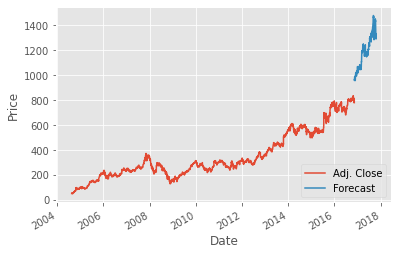

In [13]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

# forecast_out = int(math.ceil(0.003 * len(df)))
forecast_out = int(math.ceil(0.1 * len(df)))
print(f"forecast_out={forecast_out}")

df['label'] = df[forecast_col].shift(-forecast_out)
# df.dropna(inplace=True)
print(len(df))
# print(df.head(20))
# print(df.tail(20))

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)


y = np.array(df['label'])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# clf = svm.SVR()
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

with open('linearregression.pickle', 'wb') as f:
  pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)
confidence = clf.score(X_test, y_test)
print(confidence)

forecast_set = clf.predict(X_lately)

# print(forecast_set, confidence, forecast_out)

df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

print(df.tail())
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()





In [14]:
print(df.columns)
print(len(df.columns))

[np.nan for _ in range(len(df.columns)-1)]

Index(['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume', 'label',
       'Forecast'],
      dtype='object')
6


[nan, nan, nan, nan, nan]

In [15]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.8785342545410523
poly 0.14652986439923876
rbf 0.6741837078824842
sigmoid 0.7849005756253875
